In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import statistics as stats
import scipy.signal
import matplotlib.axes as maxes
import numpy as np
from operator import add

# Load all coordinates into dist

In [2]:
dist = []
for i in range(1, 21):
    x = []
    y = []
    temp_dist = []
    count = 0
    with open("//storage.ncbs.res.in/harshavardanbn/data/210331/F3/centroid" + str(i) + ".csv") as csv_file:
        csv_reader = csv.reader(csv_file, delimiter = ",")
        for row in csv_reader:
            if count == 1000:
                break
            count += 1
            x.append(row[0])
            y.append(row[1])
            if len(x) <=1:
                pass
            else:
                temp_dist.append(((float(x[-1]) - float(x[-2]))**2 + (float(y[-1]) - float(y[-2]))**2)**0.5)
    dist.append(temp_dist)

# Thresholding per frame distance

In [3]:
for i in range(len(dist)):
    for j in range(len(dist[i])):
        if dist[i][j] <= 0:
            dist[i][j] = 0

In [4]:
for i in range(len(dist)):
    dist[i] = pd.Series(dist[i])
    dist[i] = dist[i].rolling(25).mean()

# Plot individual traces for baseline trials

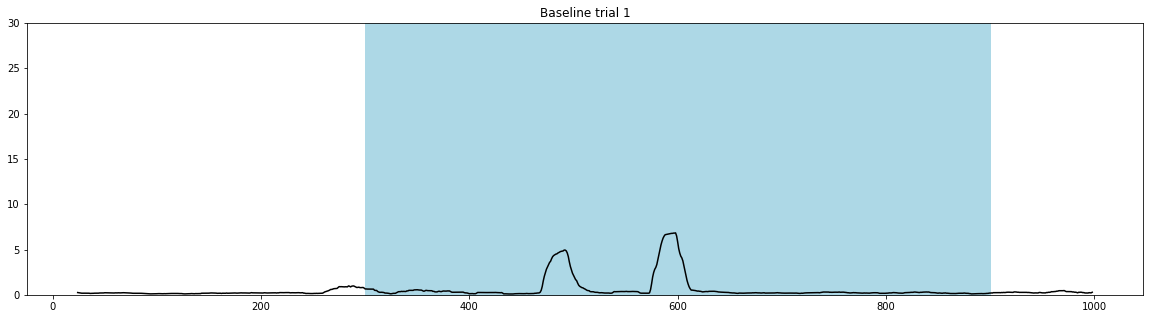

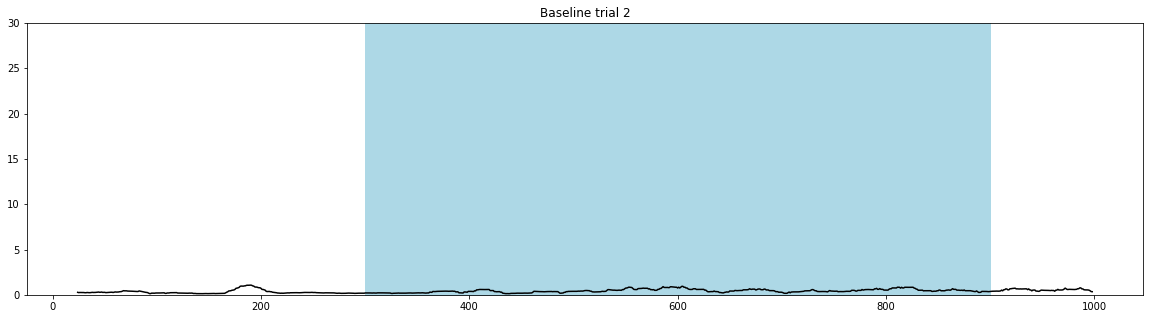

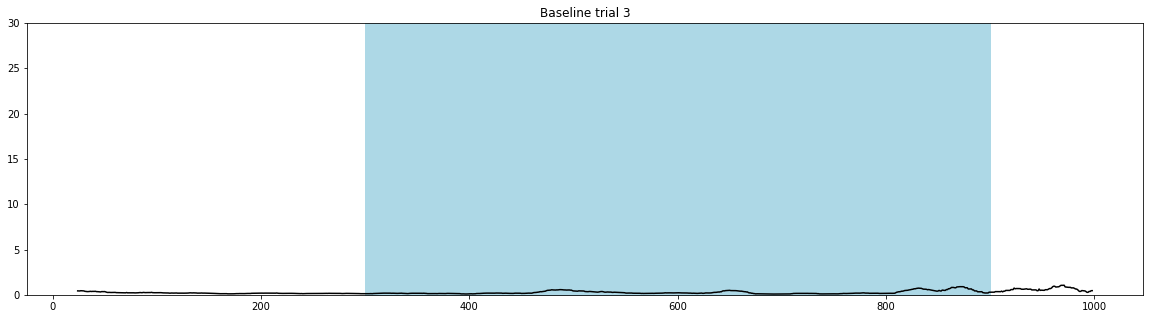

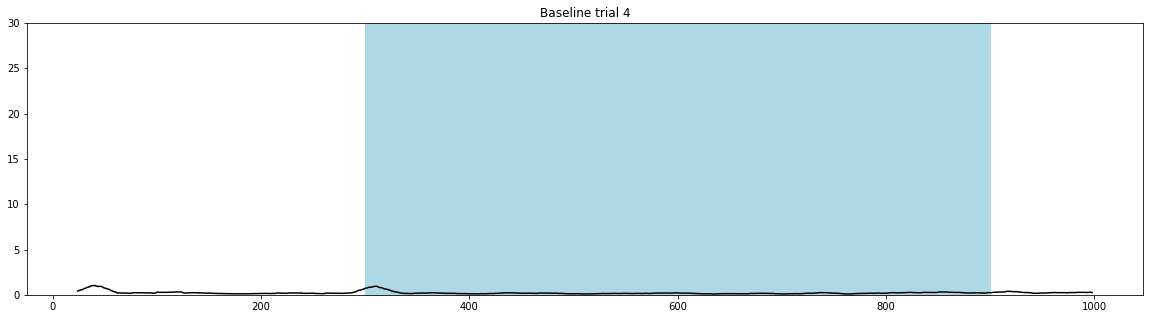

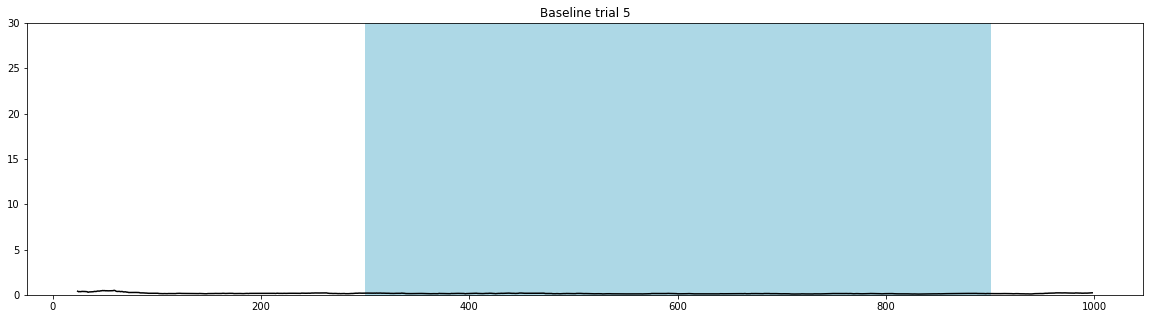

In [5]:
for i in range(5):
    plt.figure(figsize = (20, 5))
    plt.plot(dist[i], "k")
    plt.ylim(0, 30)
    plt.fill_between((300, 900), (30, 30), color = "lightblue")
    plt.title("Baseline trial " + str(i + 1))
    plt.show()

# Find peaks

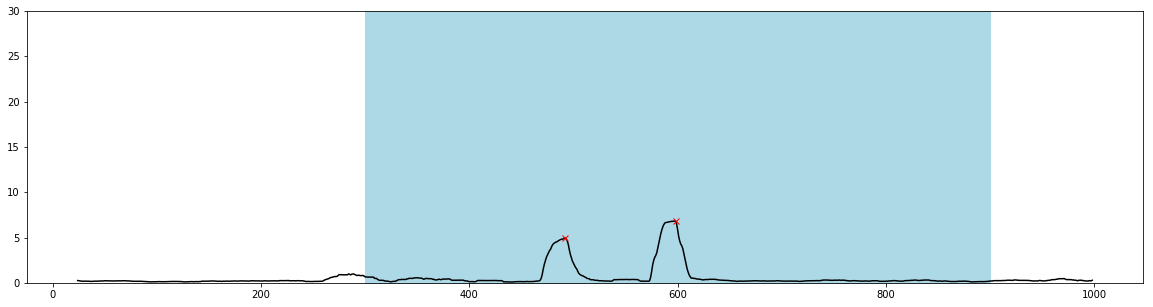

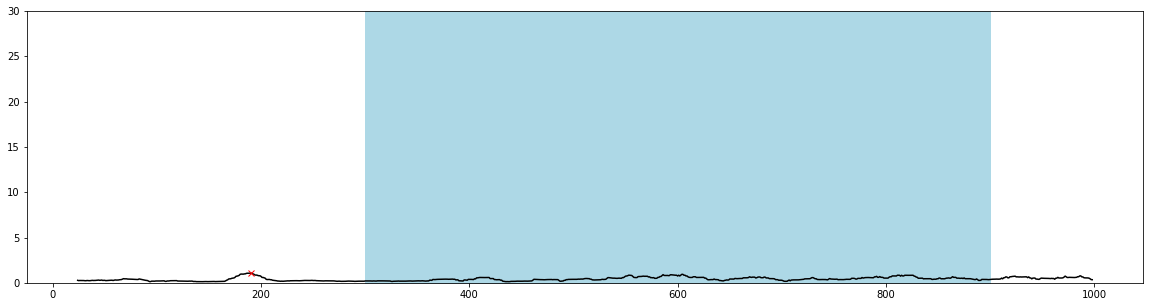

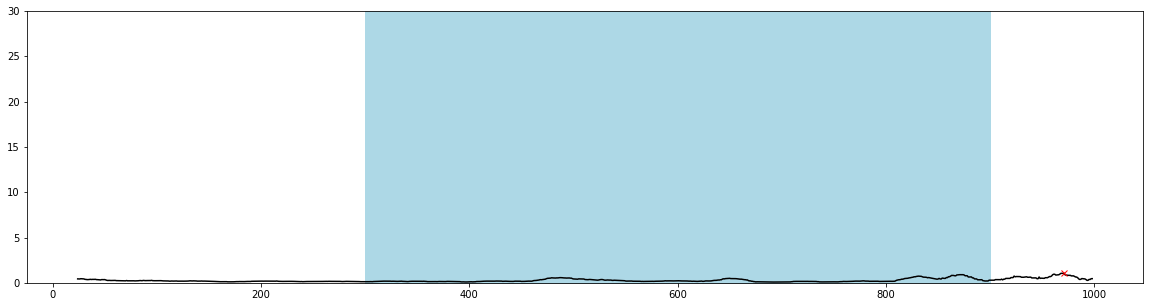

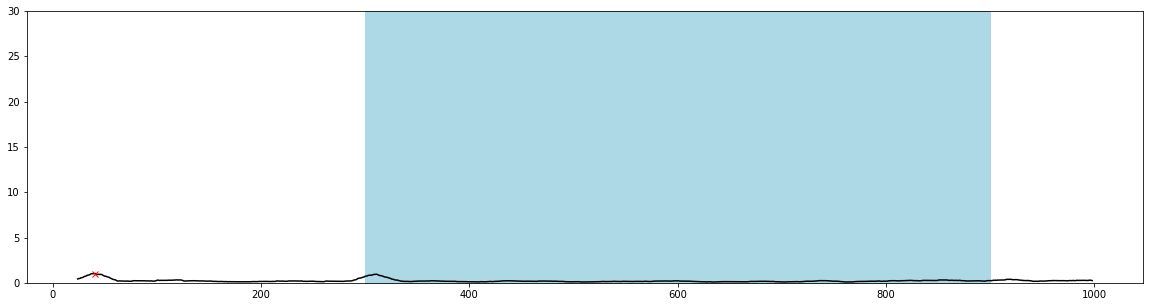

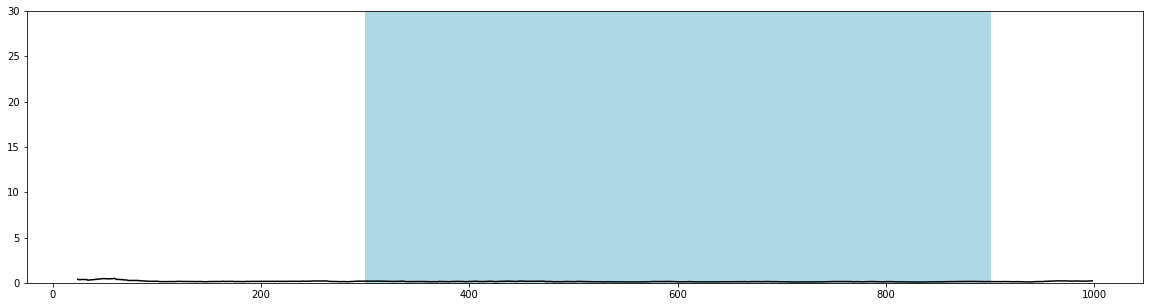

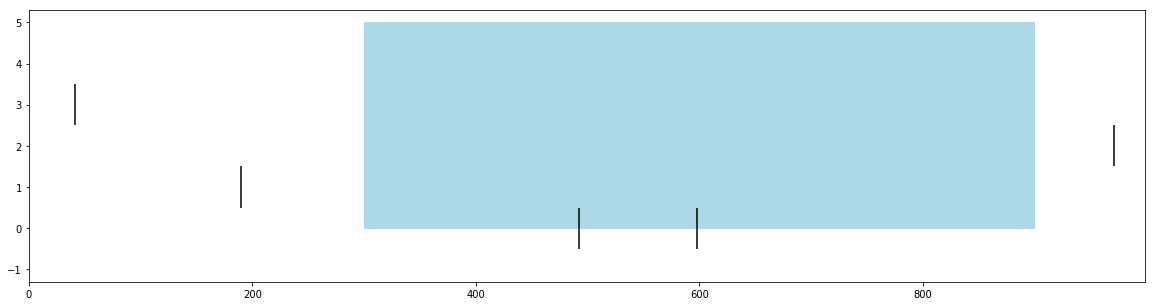

In [16]:
all_peaks = []
for i in range(5):
    peaks, _ = scipy.signal.find_peaks(dist[i], height = 1, width = 5)
    plt.figure(figsize = (20, 5))
    plt.plot(dist[i], "k")
    plt.plot(dist[i][peaks], "x", color = "r")
    plt.ylim(0, 30)
    plt.fill_between((300, 900), (30, 30), color = "lightblue")
    plt.show()
    all_peaks.append(peaks)
    
plt.figure(figsize = (20, 5))
plt.fill_between((300, 900), (5, 5), color = "lightblue")
plt.xlim(0, len(dist[0]))
plt.eventplot(all_peaks, color = "k")

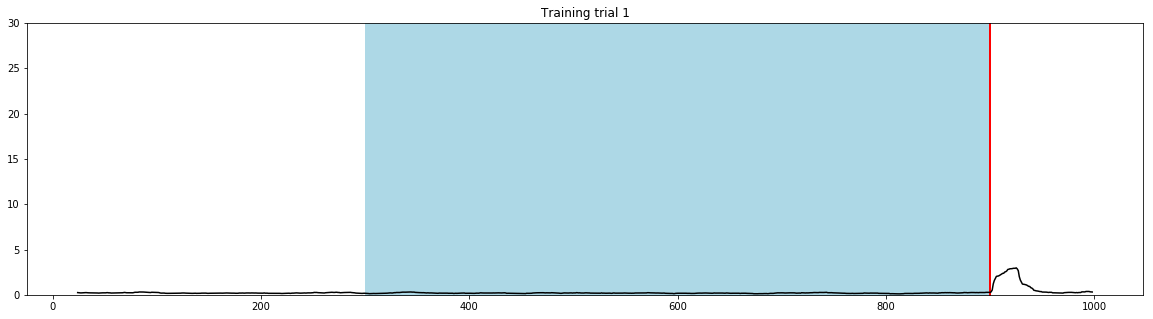

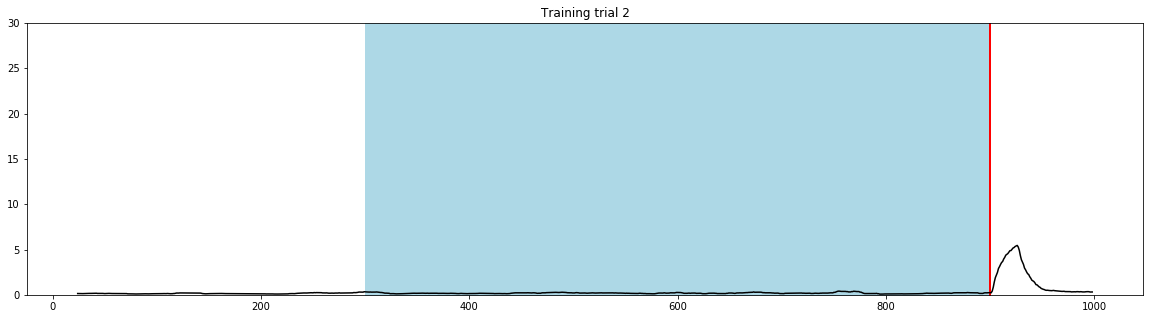

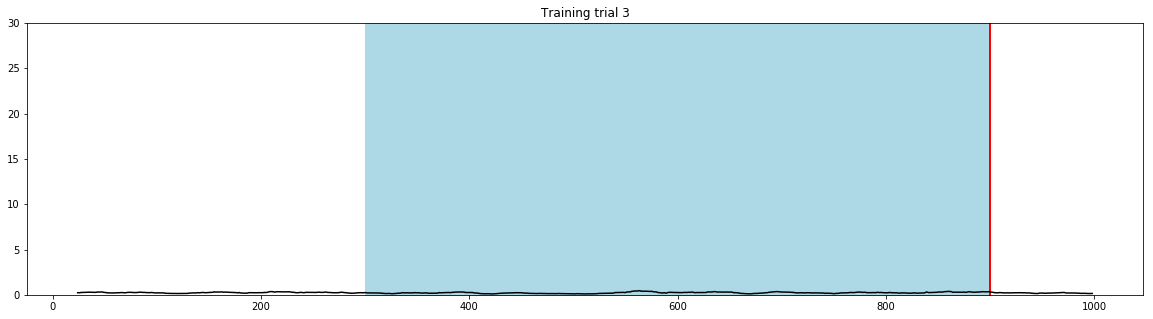

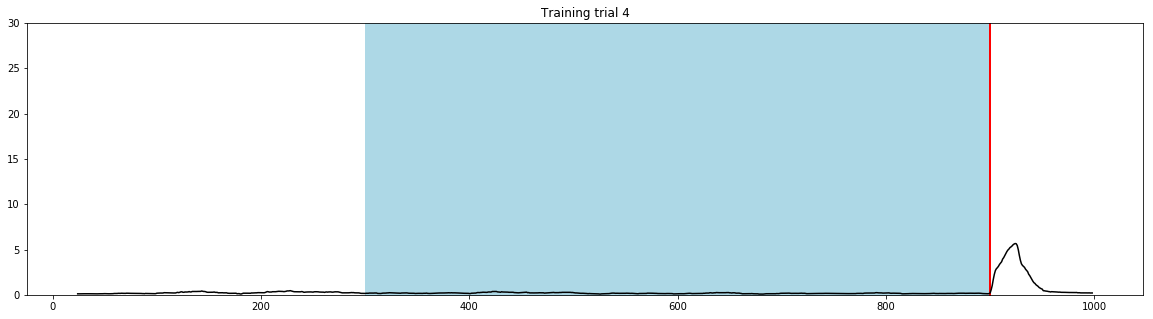

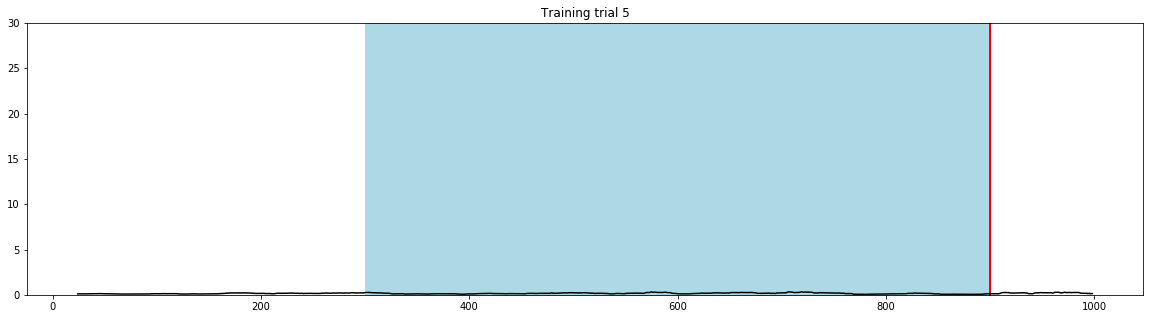

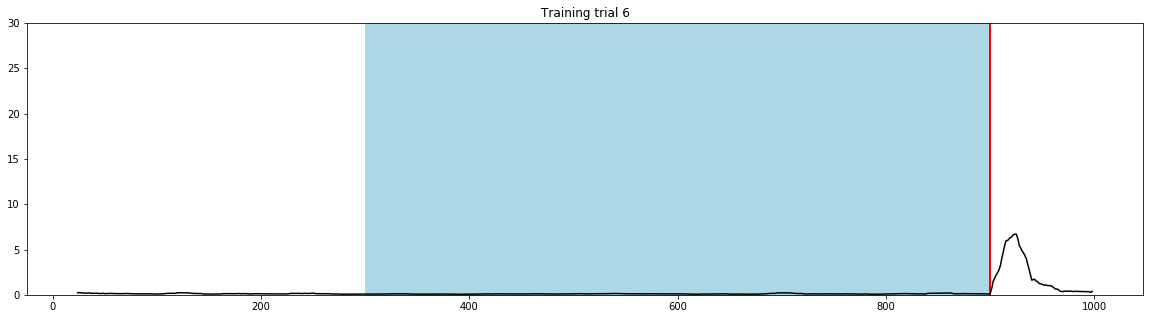

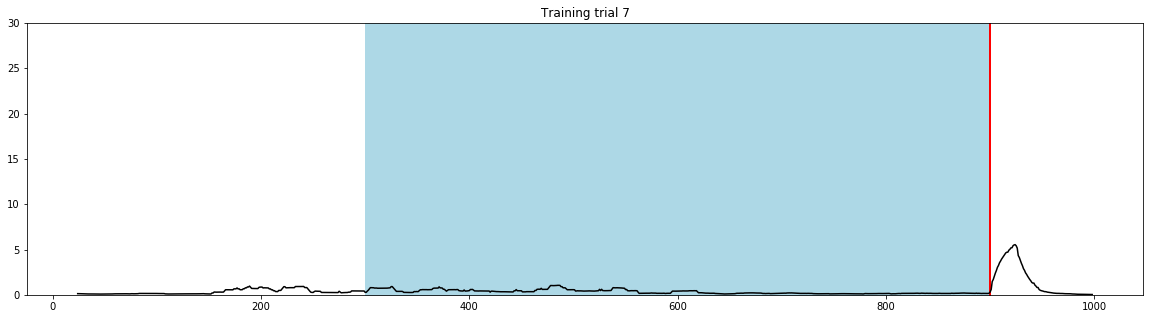

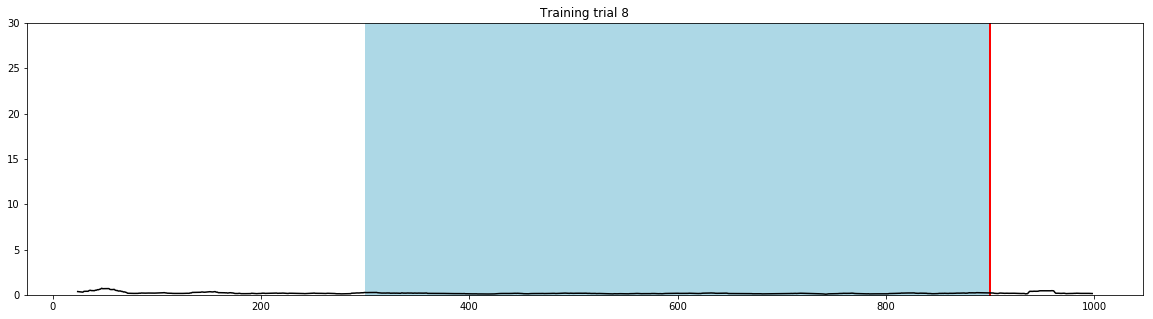

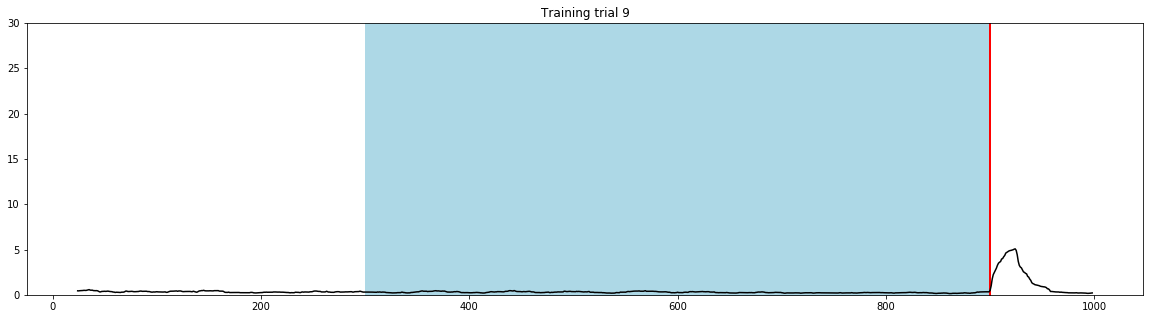

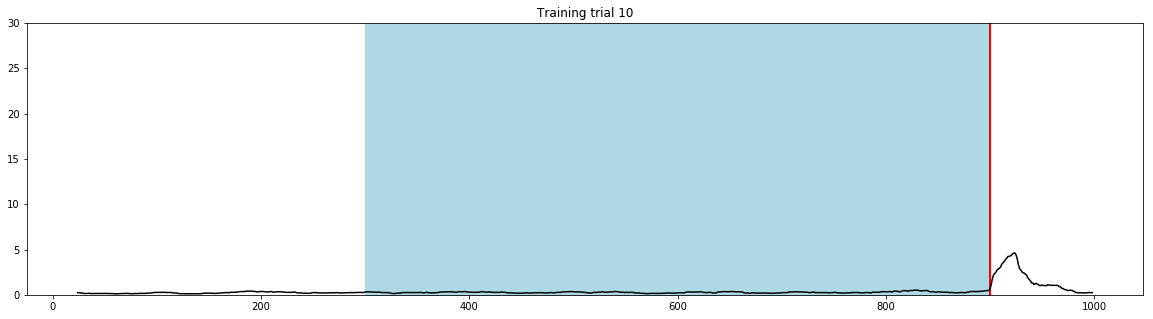

In [25]:
for i in range(5, 15):
    plt.figure(figsize = (20, 5))
    plt.plot(dist[i], "k")
    plt.ylim(0, 30)
    plt.fill_between((300, 900), (30, 30), color = "lightblue")
    plt.fill_between((898.5, 900), (30, 30), color = "red")
    plt.title("Training trial " + str(i - 4))
    plt.show()

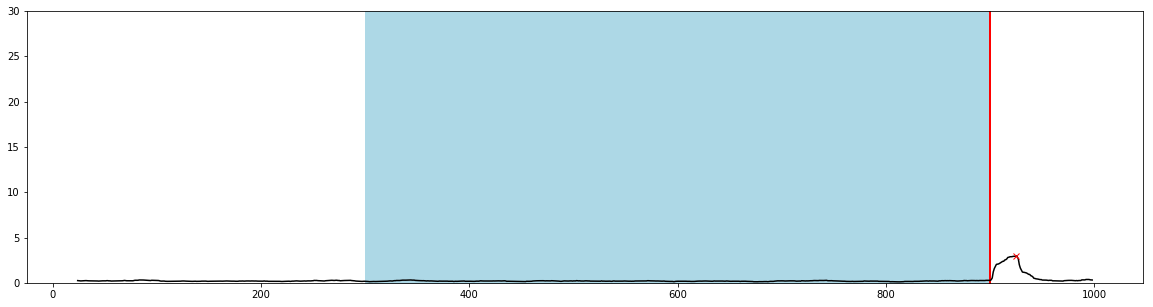

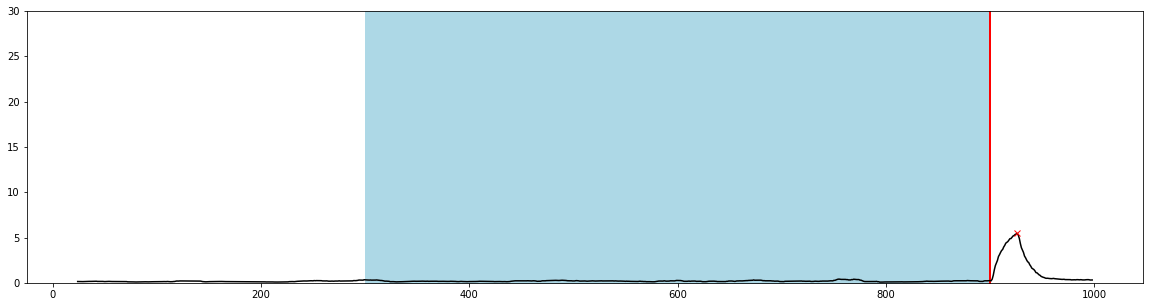

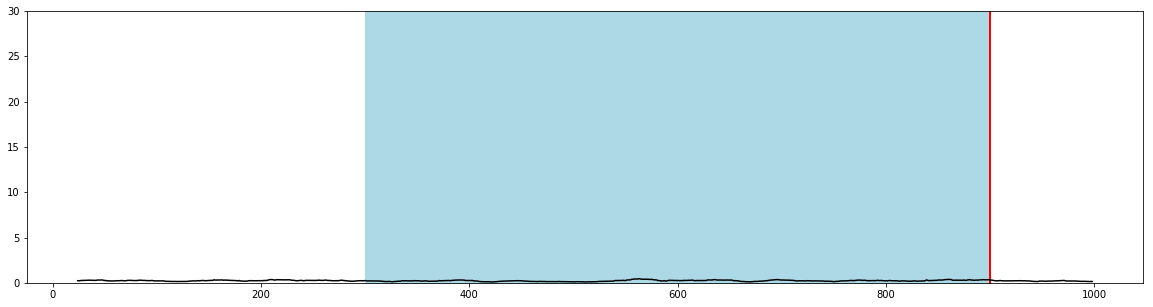

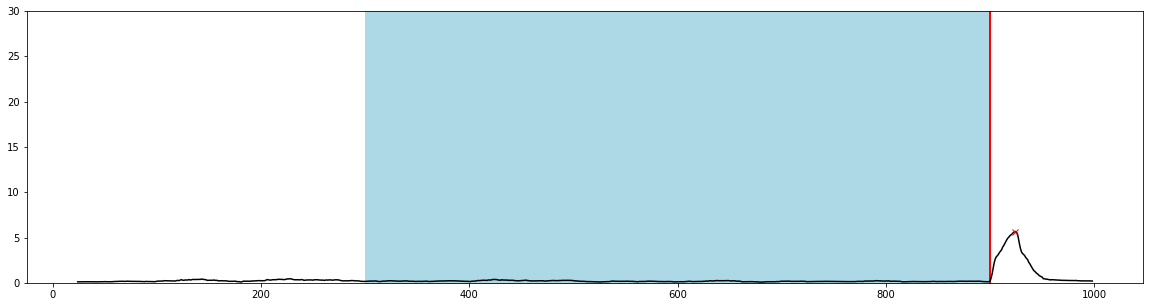

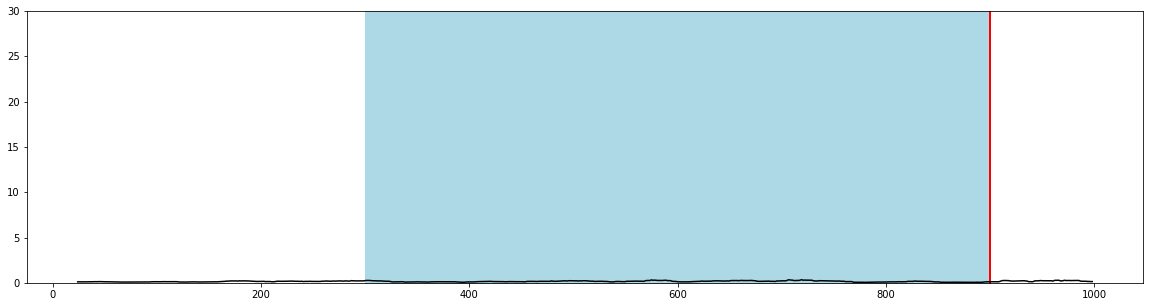

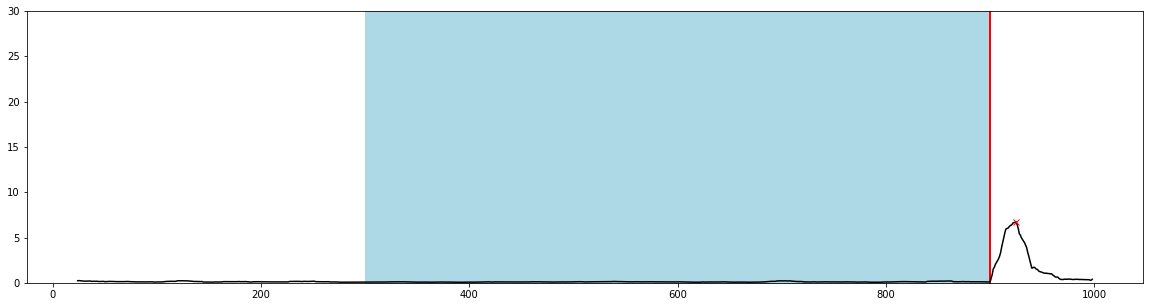

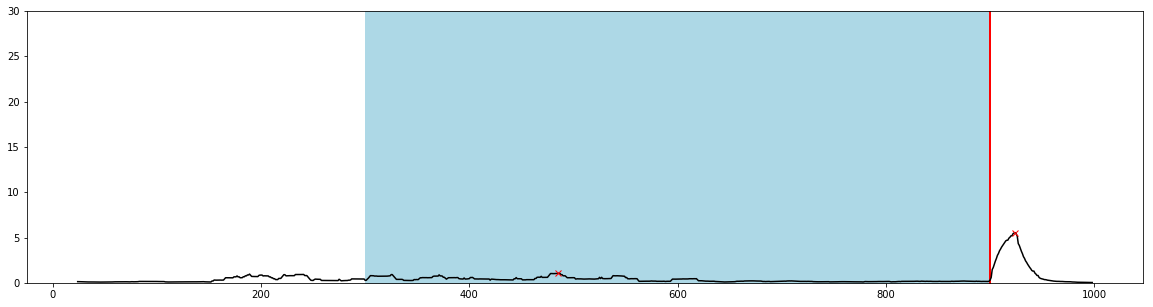

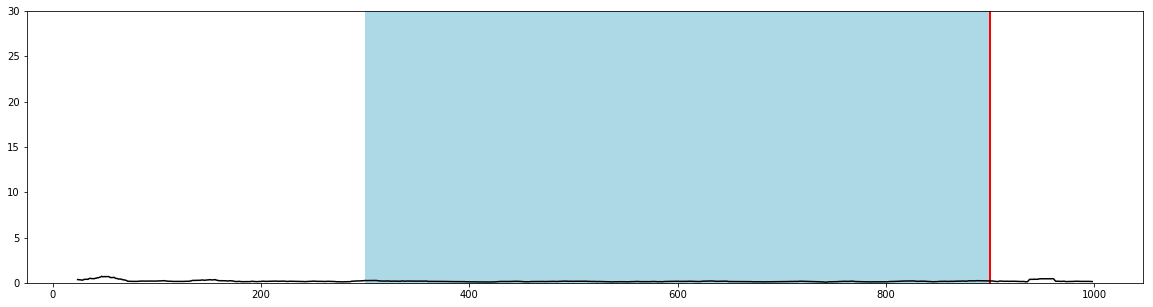

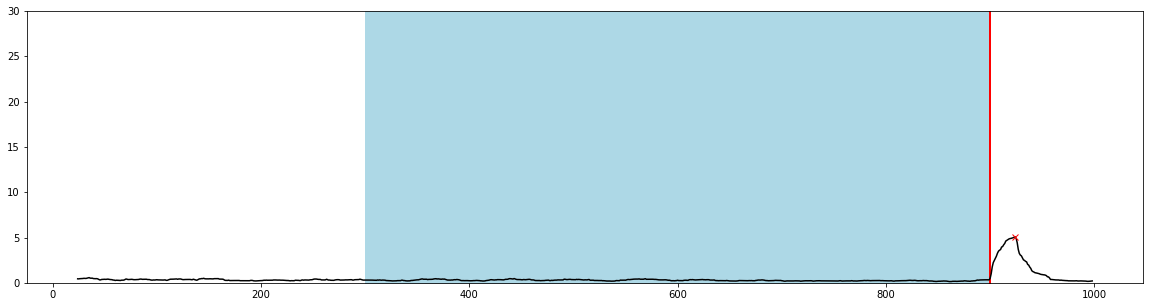

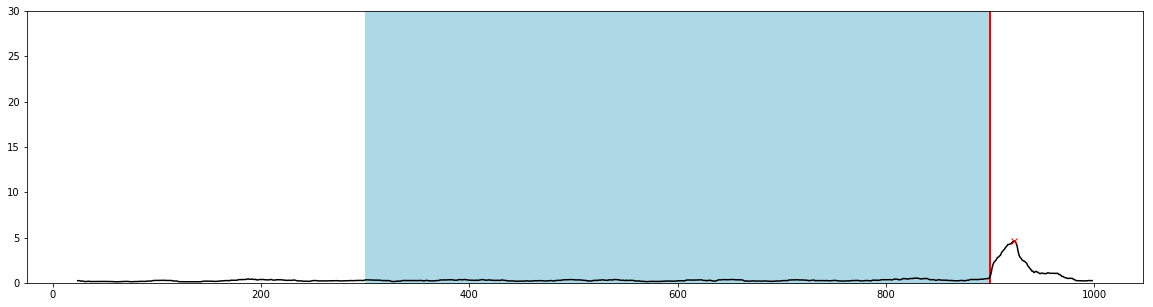

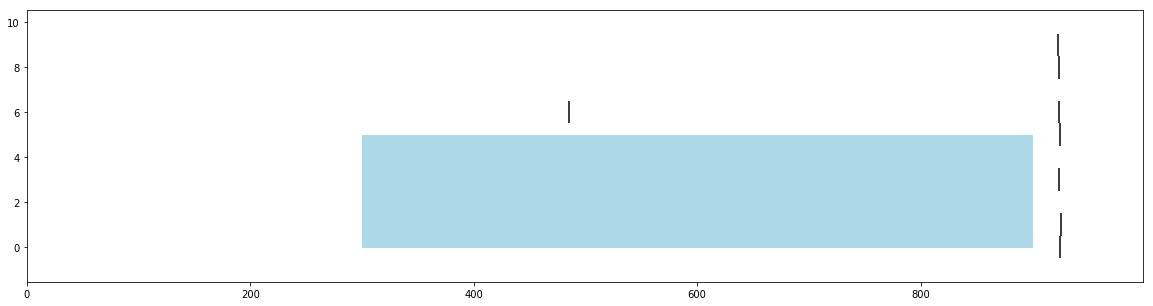

In [22]:
all_peaks = []
for i in range(5, 15):
    peaks, _ = scipy.signal.find_peaks(dist[i], height = 1, width = 5)
    plt.figure(figsize = (20, 5))
    plt.plot(dist[i], "k")
    plt.plot(dist[i][peaks], "x", color = "r")
    plt.ylim(0, 30)
    plt.fill_between((300, 900), (30, 30), color = "lightblue")
    plt.fill_between((898.5, 900), (30, 30), color = "red")
    plt.show()
    all_peaks.append(peaks)
    
plt.figure(figsize = (20, 5))
plt.fill_between((300, 900), (5, 5), color = "lightblue")
plt.xlim(0, len(dist[0]))
plt.eventplot(all_peaks, color = "k")

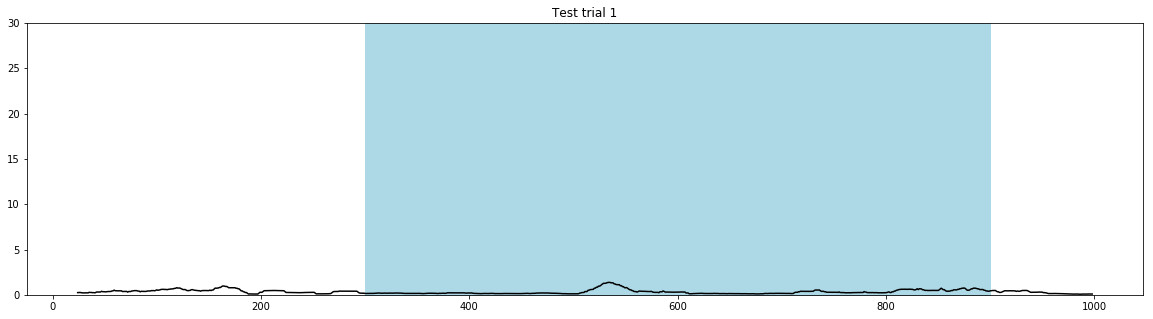

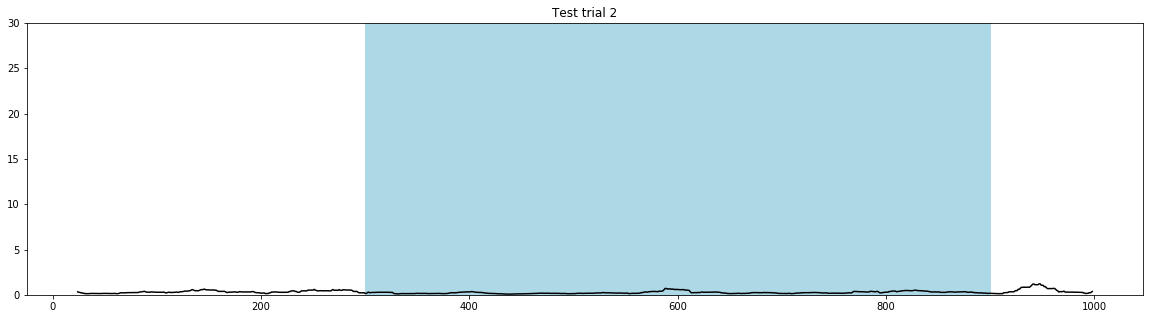

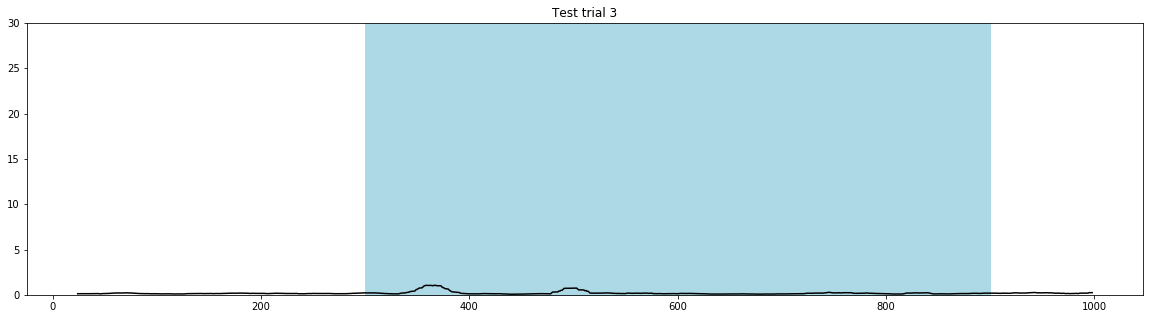

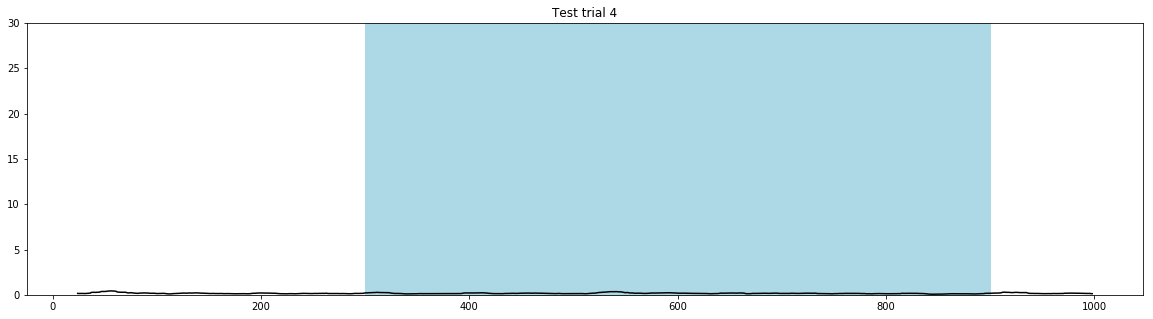

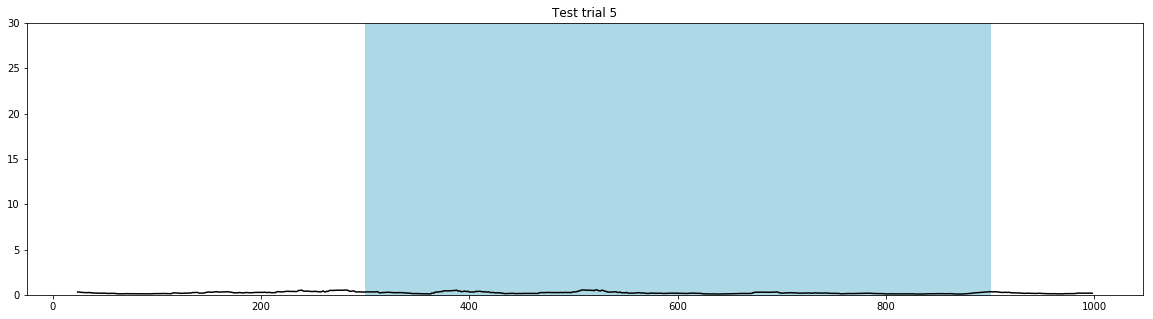

In [28]:
for i in range(15, 20):
    plt.figure(figsize = (20, 5))
    plt.plot(dist[i], "k")
    plt.ylim(0, 30)
    plt.fill_between((300, 900), (30, 30), color = "lightblue")
    plt.title("Test trial " + str(i - 14))
    plt.show()

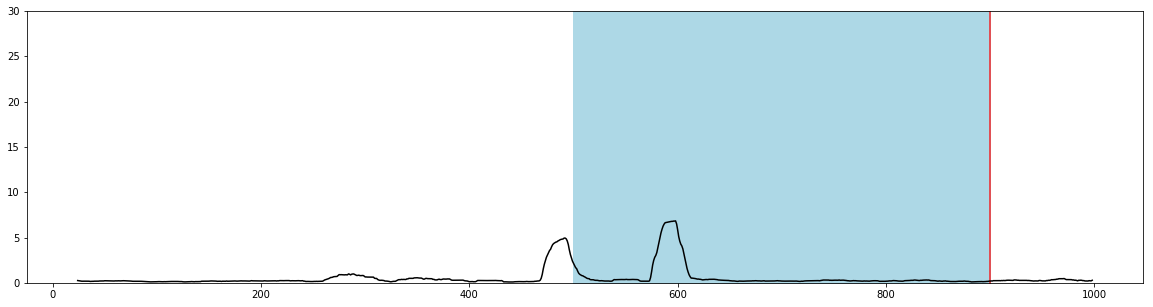

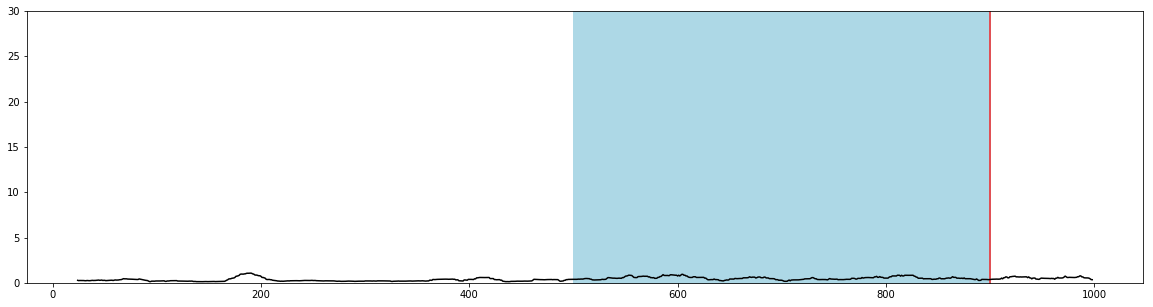

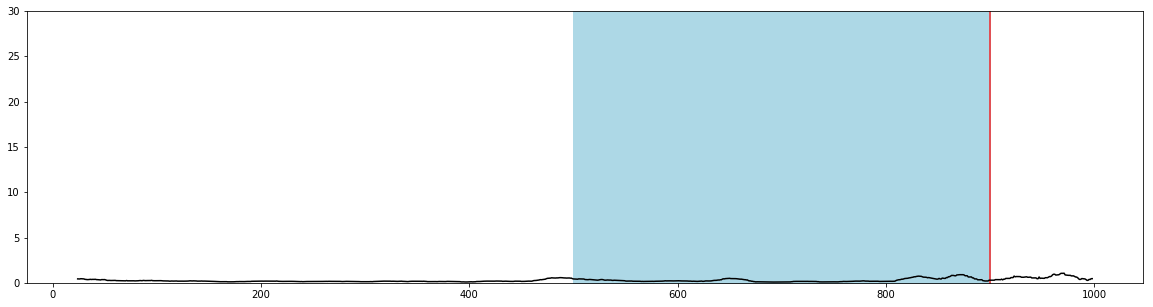

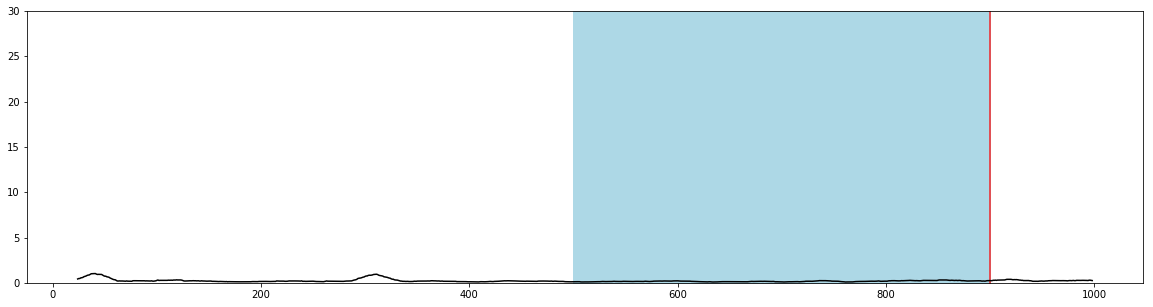

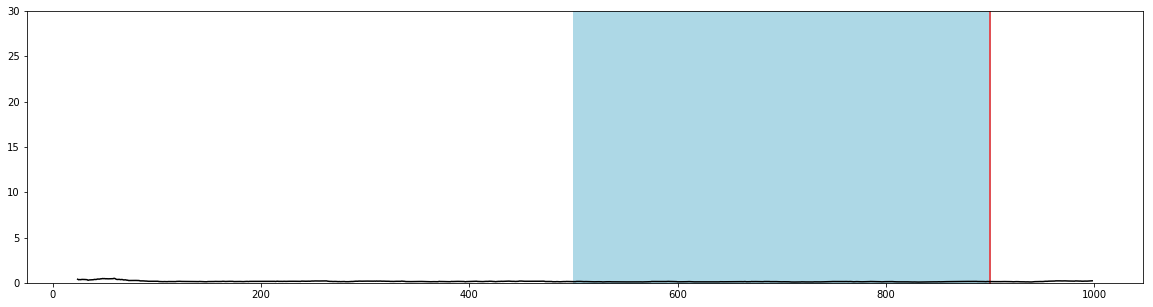

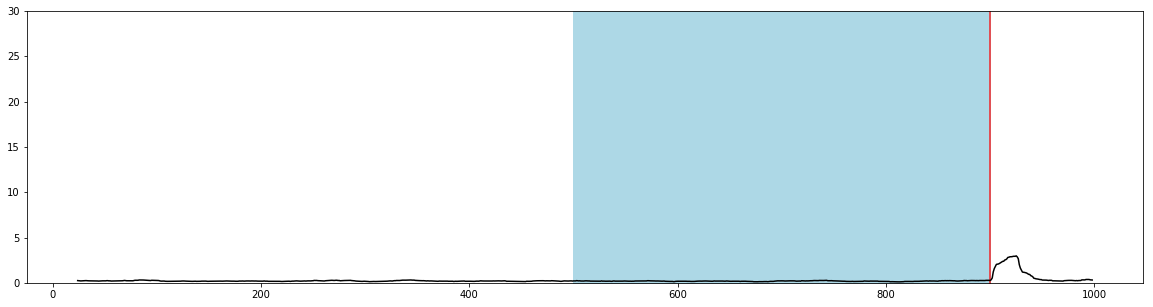

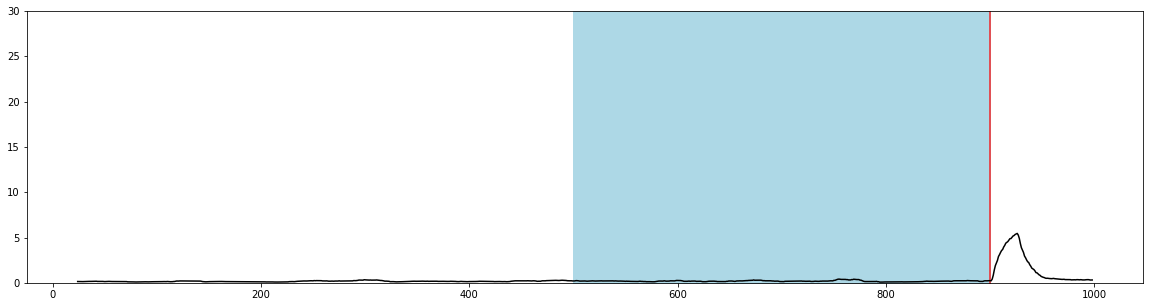

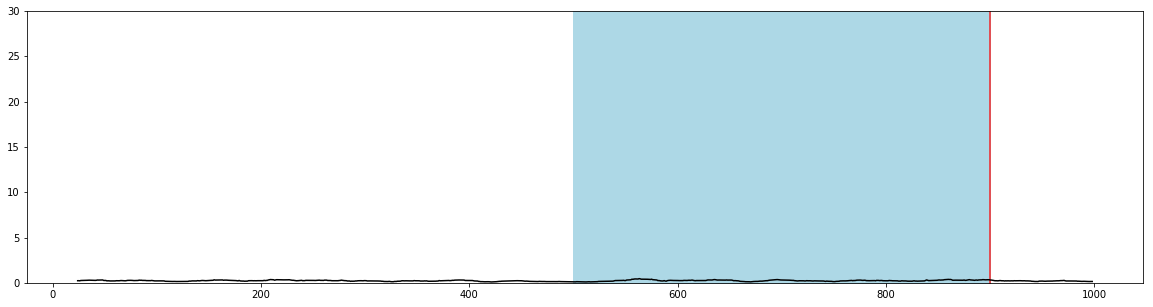

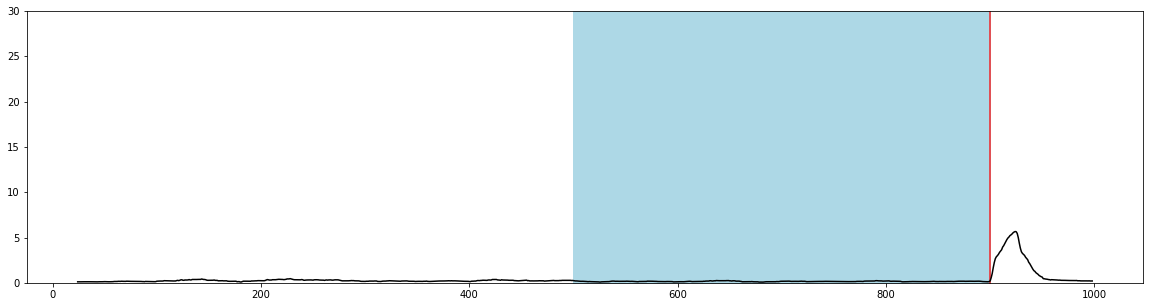

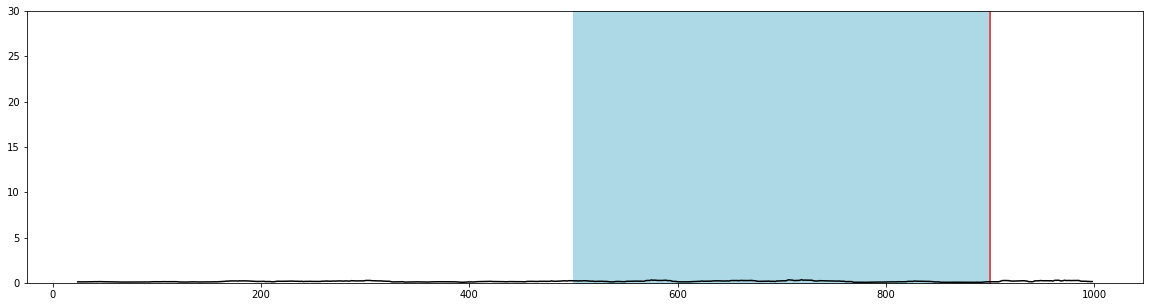

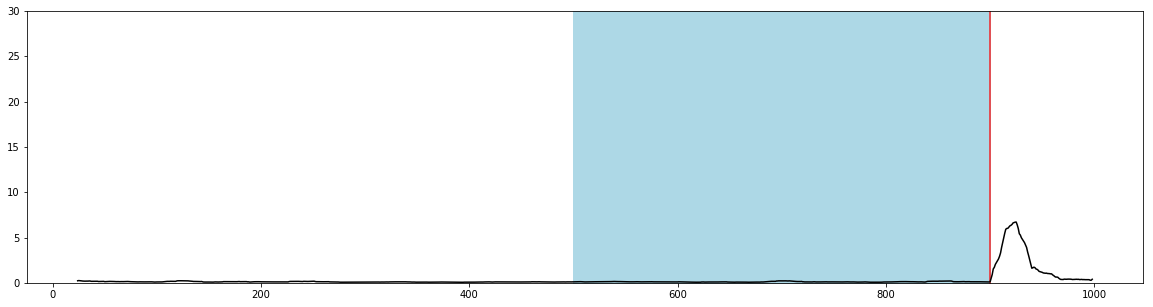

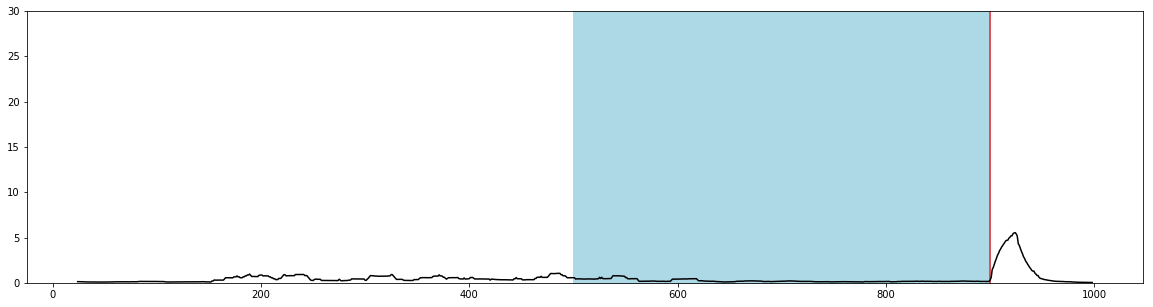

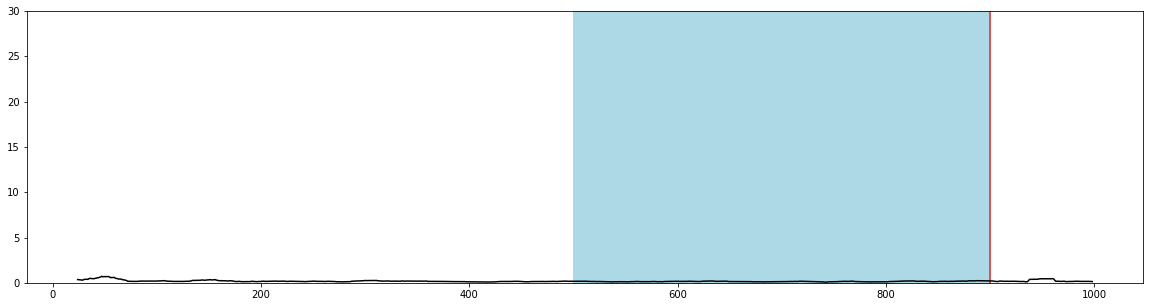

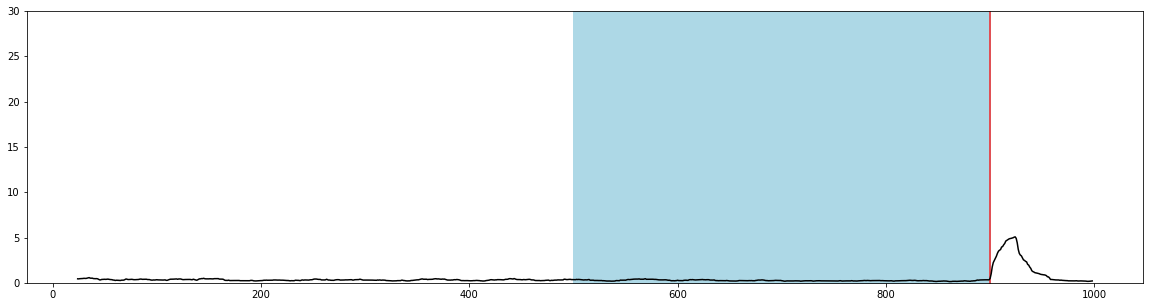

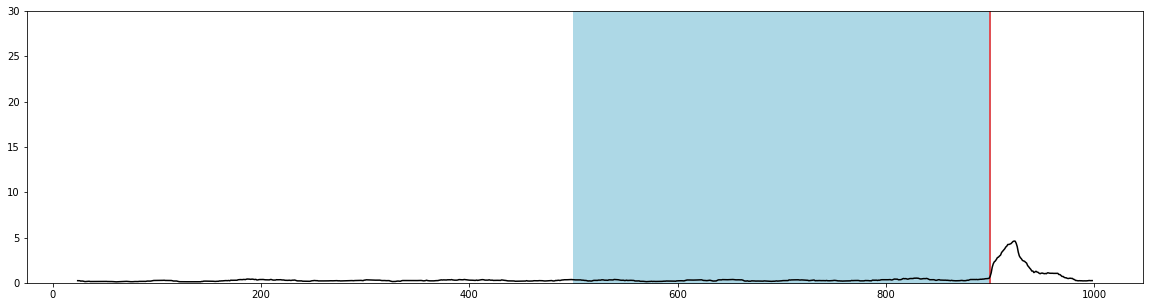

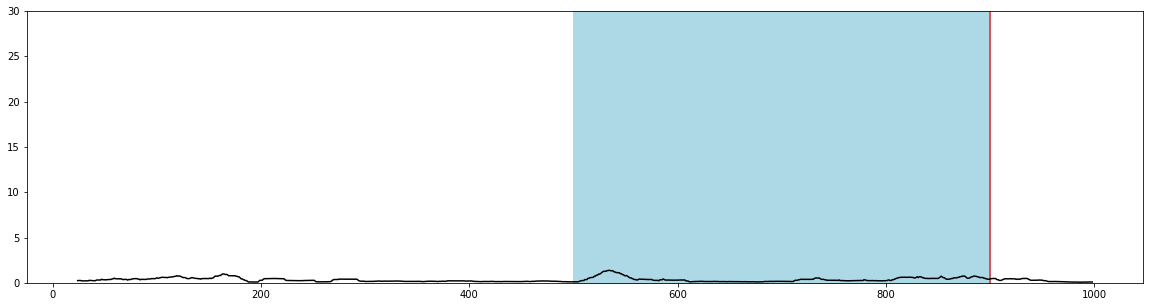

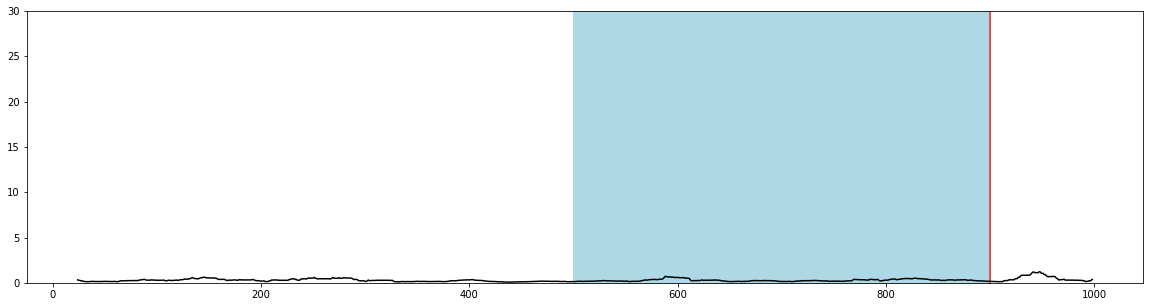

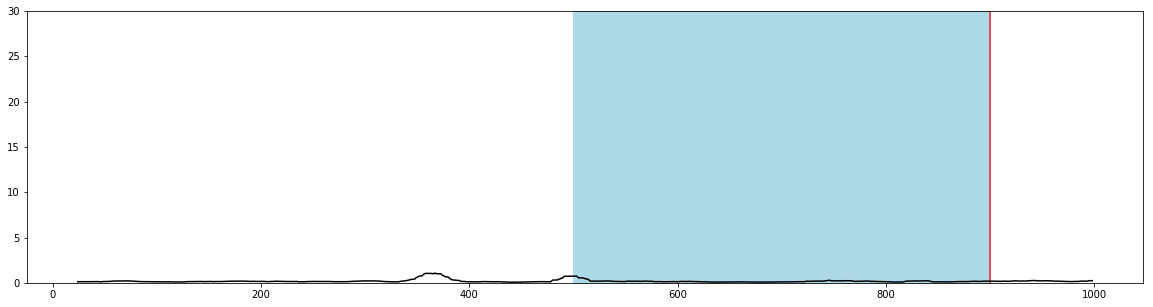

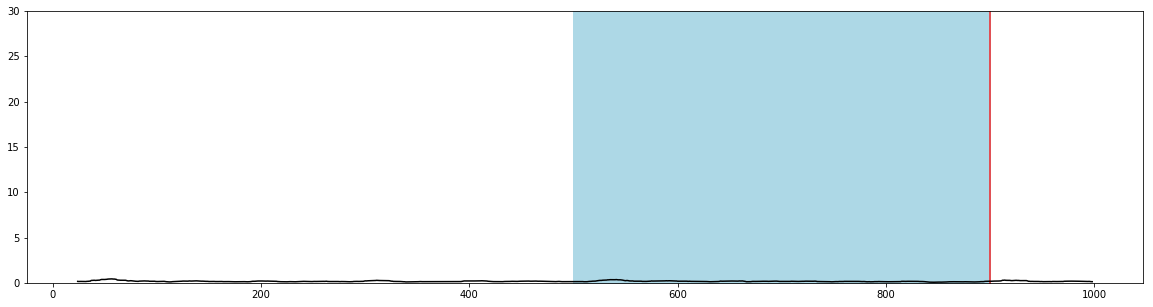

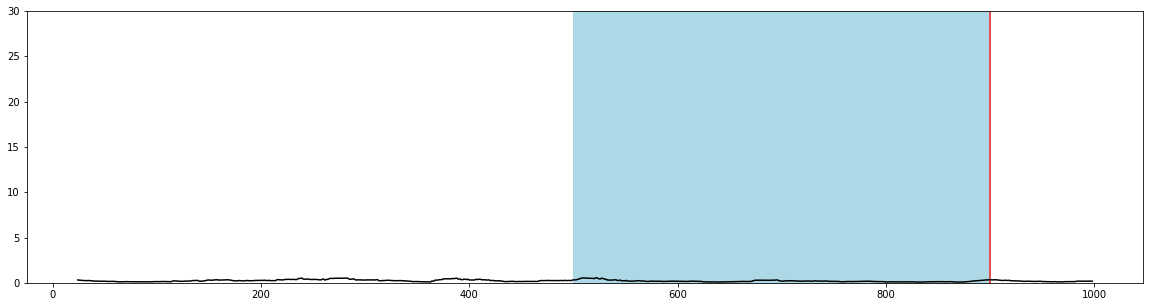

In [20]:
for i in range(len(dist)):
    plt.figure(figsize = (20, 5))
    plt.plot(dist[i], "k")
    plt.ylim(0, 30)
    plt.fill_between((500, 900), (30, 30), color = "lightblue")
    plt.fill_between((898.5, 900), (30, 30), color = "red", alpha = 0.5)
    plt.show()

NameError: name 'avg' is not defined

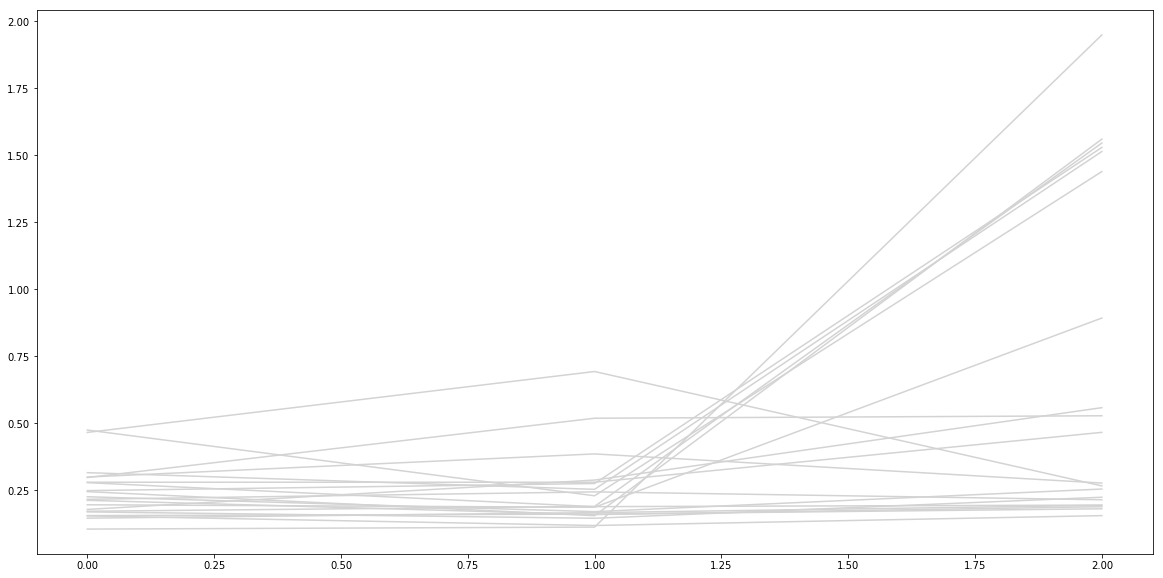

In [8]:
plt.figure(figsize = (20, 10))
for i in range(len(dist)):
    plt.plot((stats.mean(dist[i][100:490]), stats.mean(dist[i][500:890]), stats.mean(dist[i][890:1280])),
             "lightgray")
plt.plot((stats.mean(avg[100:490]), stats.mean(avg[500:890]), stats.mean(avg[890:1280])), "k")
plt.ylim(0, )

In [ ]:
all_peaks = []
for i in range(len(dist)):
    peaks, _ = scipy.signal.find_peaks(dist[i], height = 2, width = 7)
    plt.figure(figsize = (20, 5))
    plt.plot(dist[i], "k")
    plt.plot(dist[i][peaks], "x", color = "r")
    plt.ylim(0, 30)
    plt.fill_between((510, 910), (30, 30), color = "lightblue")
    plt.fill_between((900, 910), (30, 30), color = "red", alpha = 0.5)
    plt.show()
    all_peaks.append(peaks)

In [ ]:
plt.figure(figsize = (20, 5))
plt.eventplot(all_peaks)

In [ ]:
avg = [0, 0, 0]
for i in range(len(all_peaks)):
    peak_count = [0, 0, 0]
    for j in all_peaks[i]:
        if (j < 490) & (j >= 90):
            peak_count[0] +=1
        elif (j < 890) & (j >= 490):
            peak_count[1] += 1
        elif (j < 1290) & (j >= 890):
            peak_count[2] += 1
    plt.plot(peak_count, "lightgray")
    avg = list(map(add, avg, peak_count))
plt.xticks([0, 1, 2])

for i in range(len(avg)):
    avg[i] = avg[i] / len(all_peaks)

plt.plot(avg, "x", color = "k")
plt.plot(avg, color = "k")